In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [2]:
Fake = pd.read_csv("D:\Capstone Project\Fake news detection\Fake.csv")
true = pd.read_csv("D:\Capstone Project\Fake news detection\True.csv")

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
Fake.shape

(23502, 172)

In [4]:
true.shape

(21417, 4)

In [5]:
Fake['label'] = 0
true['label'] = 1

In [6]:
Fake.shape

(23502, 173)

In [7]:
Fake.columns

Index(['title', 'text', 'subject', 'date', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 163', 'Unnamed: 164', 'Unnamed: 165', 'Unnamed: 166',
       'Unnamed: 167', 'Unnamed: 168', 'Unnamed: 169', 'Unnamed: 170',
       'Unnamed: 171', 'label'],
      dtype='object', length=173)

In [8]:
Fake = Fake.loc[:, ~Fake.columns.str.contains('^Unnamed')]

In [9]:
Fake.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [10]:
Fake.drop(["date","title","subject"],axis=1,inplace=True)

In [11]:
Fake.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [12]:
true.shape

(21417, 5)

In [13]:
true.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [14]:
true.drop(["date","title","subject"],axis=1,inplace=True)

In [15]:
true.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [16]:
News = pd.concat([Fake, true]).reset_index(drop = True)
News.shape

(44919, 2)

In [17]:
from sklearn.utils import shuffle
News = shuffle(News)
News= News.reset_index(drop=True)

In [18]:
News.head()

,text,label
0,Remember this? Mayor Rawlings-Blake says that ...,0
1,WASHINGTON (Reuters) - U.S. President Donald T...,1
2,21st Century Wire says Former NSA executive an...,0
3,When Donald Trump boldly declared that he had ...,0
4,WASHINGTON (Reuters) - President Donald Trump ...,1


In [19]:
News['label'].value_counts()

0    23502
1    21417
Name: label, dtype: int64

In [20]:
import re
import string
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [21]:
News["text"] = News["text"].apply(wordopt)

label
0    23502
1    21417
Name: text, dtype: int64


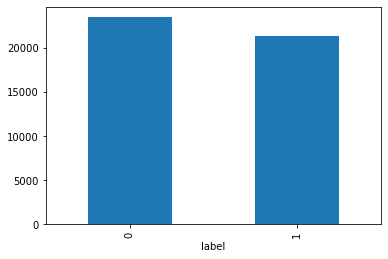

In [22]:
# How many fake and real articles?
print(News.groupby(['label'])['text'].count())
News.groupby(['label'])['text'].count().plot(kind="bar")
plt.show()

In [23]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

News['text'] = News['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
News.head(10)

,text,label
0,remember mayor rawlings blake says baltimore r...,0
1,washington reuters u president donald trump st...,1
2,century wire says former nsa executive whistle...,0
3,donald trump boldly declared released shackles...,0
4,washington reuters president donald trump inte...,1
5,washington reuters united states recognize ind...,1
6,millions dollars union dues flow democrat coff...,0
7,washington reuters u senator ted cruz texas ge...,1
8,earlier year jason chaffetz house oversight ch...,0
9,republican national convention cleveland ohio ...,0


In [25]:
#pip install WordCloud

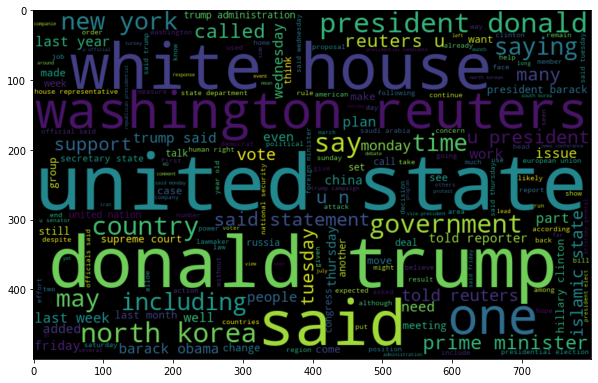

In [26]:
from wordcloud import WordCloud
plt.figure(figsize=(10,7))
wc=WordCloud(width=800,height=500,max_font_size=110).generate(" ".join(News[News.label == 1].text))
plt.imshow(wc,interpolation='bilinear')

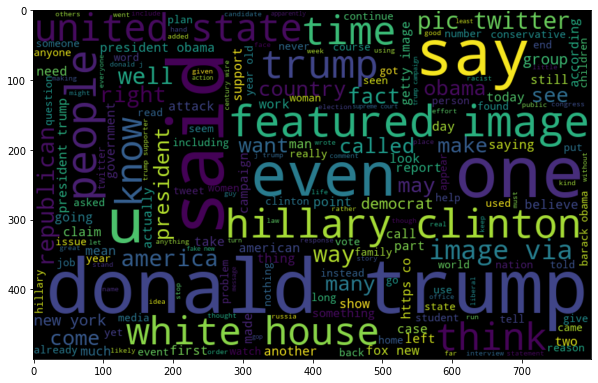

In [27]:
plt.figure(figsize=(10,7))
wc=WordCloud(width=800,height=500,max_font_size=110).generate(" ".join(News[News.label == 0].text))
plt.imshow(wc,interpolation='bilinear')

In [28]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

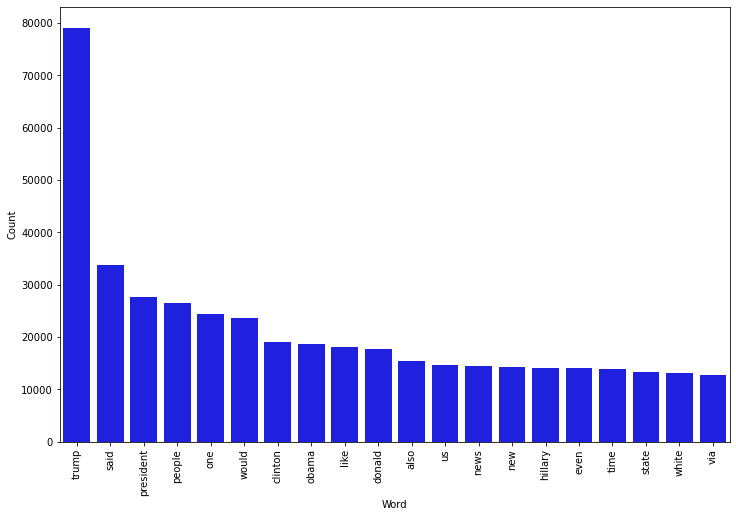

In [29]:
# Most frequent words in fake news
counter(News[News["label"] == 0], "text", 20)

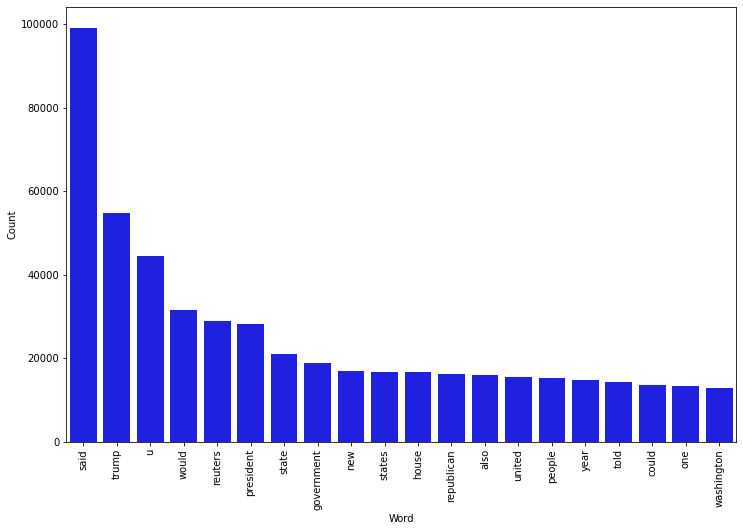

In [30]:
# Most frequent words in real news
counter(News[News["label"] == 1], "text", 20)

In [31]:
x = News["text"]
y = News["label"]

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [35]:
list1=[]

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [38]:
pred_lr=LR.predict(xv_test)

In [39]:
LR.score(xv_test, y_test)

0.9845948352626892

In [40]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pred_lr,squared=False)

0.1241175440351233

In [41]:
list1.append(LR.score(xv_test, y_test))

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5861
           1       0.98      0.98      0.98      5369

    accuracy                           0.98     11230
   macro avg       0.98      0.98      0.98     11230
weighted avg       0.98      0.98      0.98     11230



In [43]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

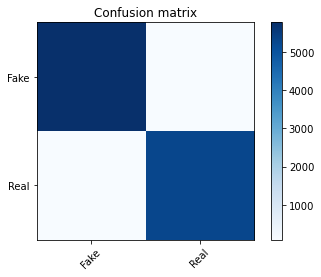

In [44]:
cm = metrics.confusion_matrix(y_test,pred_lr)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [45]:
from sklearn.naive_bayes import MultinomialNB

In [46]:
NB = MultinomialNB()
NB.fit(xv_train,y_train)

MultinomialNB()

In [47]:
pred_nb=NB.predict(xv_test)

In [48]:
NB.score(xv_test, y_test)

0.9348174532502226

In [49]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pred_nb,squared=False)

0.255308728307078

In [50]:
print(classification_report(y_test, pred_nb))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5861
           1       0.94      0.92      0.93      5369

    accuracy                           0.93     11230
   macro avg       0.94      0.93      0.93     11230
weighted avg       0.93      0.93      0.93     11230



In [51]:
list1.append(NB.score(xv_test, y_test))

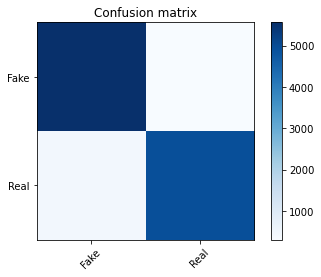

In [52]:
cm = metrics.confusion_matrix(y_test,pred_nb)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [55]:
pred_dt = DT.predict(xv_test)

In [56]:
DT.score(xv_test, y_test)

0.9943900267141585

In [57]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pred_dt,squared=False)

0.07489975491175853

In [58]:
list1.append(DT.score(xv_test, y_test))

In [59]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5861
           1       1.00      0.99      0.99      5369

    accuracy                           0.99     11230
   macro avg       0.99      0.99      0.99     11230
weighted avg       0.99      0.99      0.99     11230



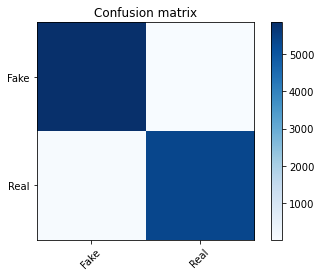

In [60]:
cm = metrics.confusion_matrix(y_test,pred_dt)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [61]:
from sklearn import svm

In [62]:
SVM= svm.SVC(kernel='linear')
SVM.fit(xv_train, y_train)

SVC(kernel='linear')

In [63]:
pred_svm = SVM.predict(xv_test)

In [64]:
SVM.score(xv_test, y_test)

0.9930543187889581

In [65]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pred_svm,squared=False)

0.08334075360255541

In [66]:
list1.append(SVM.score(xv_test, y_test))

In [67]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5861
           1       0.99      0.99      0.99      5369

    accuracy                           0.99     11230
   macro avg       0.99      0.99      0.99     11230
weighted avg       0.99      0.99      0.99     11230



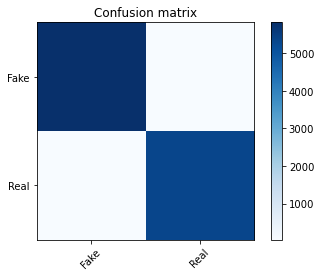

In [68]:
cm = metrics.confusion_matrix(y_test,pred_svm)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

[0.9845948352626892, 0.9348174532502226, 0.9943900267141585, 0.9930543187889581]


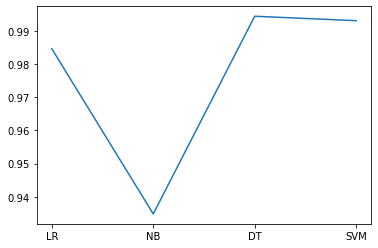

In [69]:
print(list1)
list2=["LR","NB","DT","SVM"]
plt.plot(list2,list1)

In [70]:
def output_lable(n):
    if n == 0:
        return "FAKE NEWS"
    else:
        return "TRUE NEWS"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_dt = DT.predict(new_xv_test)

    return print( "\nDT Prediction: {} ".format(output_lable(pred_dt[0])))

In [73]:
news = str(input())
manual_testing(news)


BRUSSELS (Reuters) - NATO allies on Tuesday welcomed President Donald Trump s decision to commit more forces to Afghanistan, as part of a new U.S. strategy he said would require more troops and funding from America s partners. Having run for the White House last year on a pledge to withdraw swiftly from Afghanistan, Trump reversed course on Monday and promised a stepped-up military campaign against  Taliban insurgents, saying:  Our troops will fight to win .  U.S. officials said he had signed off on plans to send about 4,000 more U.S. troops to add to the roughly 8,400 now deployed in Afghanistan. But his speech did not define benchmarks for successfully ending the war that began with the U.S.-led invasion of Afghanistan in 2001, and which he acknowledged had required an   extraordinary sacrifice of blood and treasure .  We will ask our NATO allies and global partners to support our new strategy, with additional troops and funding increases in line with our own. We are confident they w